In [1]:
import pandas as pd
df = pd.read_csv('../data/insurance_claims.csv')

##### Outliers Analysis Using Boxplot
Boxplots are one of the best ways of analysing the spread of a numeric variable.
- Outliers in data can arise due to genuine reasons or because of dubious entries. 
- In the latter case, remove such entries.
- In the former case, determine whether removing them would add value to your analysis.

In [2]:
num_cols = df.select_dtypes(exclude="object").columns
df[num_cols].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
90%,371.000000,53.000000,914160.700000,2000.000000,1564.724000,6.000000e+06,614000.400000,64420.000000,0.000000,21.000000,3.00000,2.000000,3.000000,81364.00000,14380.000000,14142.000000,58728.000000,2013.000000,NaN
95%,429.050000,57.000000,954279.100000,2000.000000,1653.443500,6.000000e+06,617463.350000,70615.000000,0.000000,23.000000,3.00000,2.000000,3.000000,88413.00000,15662.000000,15540.000000,63094.500000,2014.000000,NaN
99%,467.010000,61.000000,991002.820000,2000.000000,1851.876500,8.000000e+06,620197.100000,83603.000000,0.000000,23.000000,4.00000,2.000000,3.000000,101018.50000,17682.000000,19471.800000,73263.600000,2015.000000,NaN


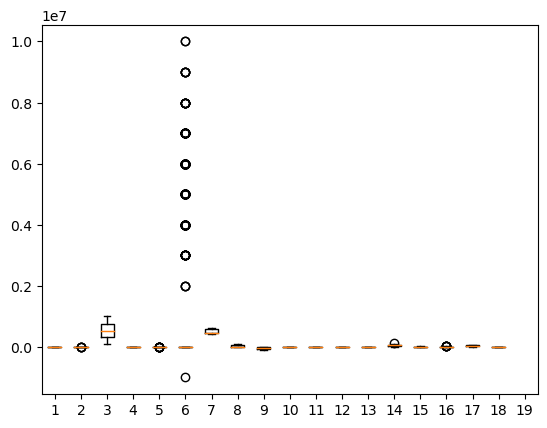

In [3]:
import matplotlib.pyplot as plt
plt.boxplot(df[num_cols])
plt.show()

###### number 6 column - umbrella limit is having lot of outliers - lets handle that

In [4]:
df["umbrella_limit"].describe()

count    1.000000e+03
mean     1.101000e+06
std      2.297407e+06
min     -1.000000e+06
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+07
Name: umbrella_limit, dtype: float64

In [10]:
df[df["umbrella_limit"]<0]["umbrella_limit"]
# its a typo - make it positive

290   -1000000
Name: umbrella_limit, dtype: int64

In [12]:
df["umbrella_limit"] = df["umbrella_limit"].apply(lambda x:1000000 if x==-1000000 else x)
df[df["umbrella_limit"]<0]["umbrella_limit"].count()

0

In [16]:
df["umbrella_limit"].max()

10000000

these values look like legit high limits - so leave them as is